In [5]:
import pyddm
import numpy as np
import matplotlib.pyplot as plt


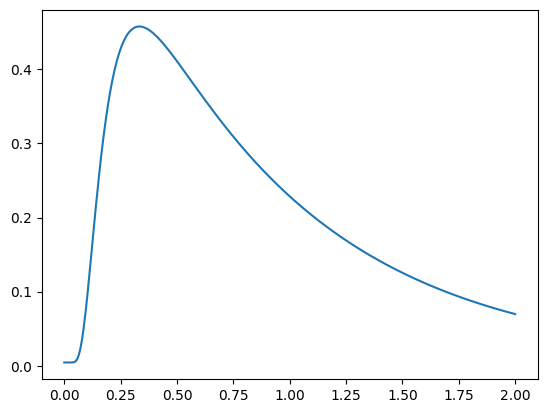

In [2]:
import matplotlib.pyplot as plt
import pyddm
model = pyddm.gddm()
s = model.solve()
plt.plot(s.t_domain, s.pdf("correct"))
plt.show()

In [4]:
model = pyddm.gddm(drift=0.5, noise=1.0, bound=0.6, starting_position=0.3, nondecision=0.2)

In [8]:
model_to_fit = pyddm.gddm(drift="d", noise=1.0, bound="B", nondecision=0.2, starting_position="x0",
                          parameters={"d": (-2,2), "B": (0.3, 2), "x0": (-.8, .8)})
model_to_fit.show()

Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fittable parameters:
    - drift: Fittable (default 0.687192)
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fittable parameters:
    - B: Fittable (default 1.053783)
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fittable parameters:
    - x0: Fittable (default 0.171302)
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.200000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed parameters:
        - umixturecoef: 0.020000



In [11]:
samp_simulated = s.sample(10000)

In [12]:
model_to_fit.fit(samp_simulated, lossfunction=pyddm.LossBIC, verbose=False)
model_to_fit.show()

Info: Params [-0.0134689   0.74768909  0.00530349] gave 28305.134004401312


Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: -0.013469
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fitted parameters:
    - B: 0.747689
IC component ICPointRatio:
    An arbitrary starting point expressed as a proportion of the distance between the bounds.
    Fitted parameters:
    - x0: 0.005303
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fixed parameters:
        - nondectime: 0.200000
    Overlay component OverlayUniformMixture:
        Uniform distribution mixture model
        Fixed parameters:
        - umixturecoef: 0.020000
Fit information:
    Loss function: BIC
    Loss function value: 28305.134004401312
    Fitting method: differential_evolution
    Solver: auto
    Other properti

In [13]:
model_to_fit.parameters()

{'drift': {'drift': Fitted(-0.013468902942987332, minval=-2, maxval=2)},
 'noise': {'noise': 1.0},
 'bound': {'B': Fitted(0.747689091004142, minval=0.3, maxval=2)},
 'IC': {'x0': Fitted(0.005303486555391146, minval=-0.8, maxval=0.8)},
 'overlay': {'nondectime': 0.2, 'umixturecoef': 0.02}}

In [14]:
model_to_fit.get_fit_result().value()

np.float64(28305.134004401312)

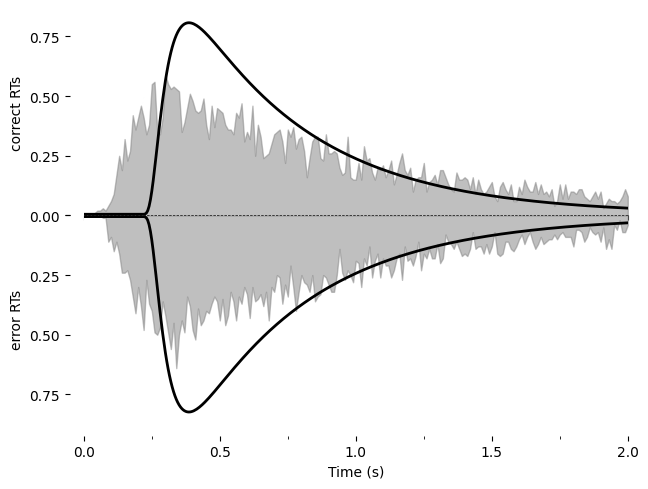

In [16]:
import pyddm.plot
import matplotlib.pyplot as plt
pyddm.plot.plot_fit_diagnostics(model=model_to_fit, sample=samp_simulated)
plt.savefig("simple-fit.png")
plt.show()

In [18]:
print(s.prob("correct"))
print(s.pdf("error"))

0.44617782076027074
[0.00445065 0.00445065 0.00445065 0.00445065 0.00445065 0.00445086
 0.004455   0.00448796 0.00463277 0.00506275 0.00603823 0.0078662
 0.01084489 0.01521628 0.02113793 0.02867475 0.03780563 0.04843866
 0.06042967 0.07360035 0.08775424 0.10268949 0.11820848 0.13412453
 0.15026623 0.16647982 0.18263015 0.19860066 0.21429263 0.22962399
 0.24452789 0.25895116 0.27285275 0.28620222 0.29897829 0.31116754
 0.32276325 0.33376426 0.3441741  0.35400011 0.36325272 0.37194487
 0.38009141 0.38770869 0.39481414 0.40142596 0.40756282 0.41324368
 0.41848754 0.42331331 0.42773969 0.43178506 0.43546741 0.43880424
 0.44181258 0.44450888 0.44690903 0.44902834 0.45088153 0.45248271
 0.45384542 0.4549826  0.45590661 0.45662926 0.4571618  0.45751497
 0.45769897 0.45772351 0.45759783 0.45733071 0.45693047 0.45640502
 0.45576188 0.45500815 0.45415059 0.45319559 0.45214921 0.45101719
 0.44980496 0.44851768 0.44716021 0.44573716 0.4442529  0.44271154
 0.441117   0.43947296 0.43778291 0.4360501

In [6]:
plt.imshow(np.log(.01+s.pdf_evolution()))
plt.show()

ValueError: Probability evolution unavailable

In [ ]:
n_trials = 5  # Number of trajectories to plot

plt.figure(figsize=(8, 5))
for _ in range(n_trials):
    t, x = s.simulate_trajectory()
    plt.plot(t, x, alpha=0.7)

In [ ]:

# Plot boundaries
plt.axhline(1, color='k', linestyle="--", label="Upper Boundary")
plt.axhline(-1, color='k', linestyle="--", label="Lower Boundary")

plt.xlabel("Time (s)")
plt.ylabel("Evidence Accumulation")
plt.title("Simulated Evidence Accumulation Paths")
plt.legend()
plt.show()

other DDM: 

https://hddm.readthedocs.io/en/latest/

